
### Source Chinese corpus can be downloaded from [Chinese-SNACS](https://github.com/nert-nlp/Chinese-SNACS/blob/master/snacs_plain.txt). Which is  obtained from the [AMR project](https://amr.isi.edu/download/amr-bank-struct-v1.6.txt). 

#### The main challenge of Chinese corpus is to deal with Chinese text segmentation, generally, we use the module [jieba](https://github.com/fxsjy/jieba) to do the task, but luckily, this corpus alreadly use space to split word and we can neglect this process. 

In [86]:
"""
To-Do: 

1. Check how does the function calculate the collocation score between 2 word, you may search this line:
score_list = finder.score_ngrams(bigram_measures.student_t)
the variable student_t represents we use student_t to calculate, but there are other measure such as raw_freq, .pmi, .likelihood_ratio, .chi_sq, .phi_sq, .fisher, .student_t, .mi_like, .poisson_stirling, .jaccard, .dice
recall statistic and change it into the most appropiate one

2. Add keyword in words_of_interest

3. The function get_collocations(tokens, windowsize=10, numresults=10) is for finding the top collocations in a corpus, which we did not use in this script

4. Adjust the output figure properties in the last 2 block, such as node size/ color...

5. Add elements in ignored_words = []


"""

'\nTo-Do: \n\n1. Check how does the function calculate the collocation score between 2 word, you may search this line:\nscore_list = finder.score_ngrams(bigram_measures.student_t)\nthe variable student_t represents we use student_t to calculate, but there are other measure such as raw_freq, .pmi, .likelihood_ratio, .chi_sq, .phi_sq, .fisher, .student_t, .mi_like, .poisson_stirling, .jaccard, .dice\nrecall statistic and change it into the most appropiate one\n\n2. Add keyword in words_of_interest\n\n3. The function get_collocations(tokens, windowsize=10, numresults=10) is for finding the top collocations in a corpus, which we did not use in this script\n\n4. Adjust the output figure properties in the last 2 block, such as node size/ color...\n\n5. Add elements in ignored_words = []\n\n\n'

In [87]:
#!/usr/bin/env python3
import string
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures
from nltk.corpus import stopwords
import nltk


In [88]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
# Use Natural Language Toolkit to find the top collocations in a corpus, "token" for tokenize data
def get_collocations(tokens, windowsize=10, numresults=10):

    # initialize the bigram association measures object to score each collocation
    bigram_measures = BigramAssocMeasures()

    # initialize the bigram collocation finder object to find and rank collocations
    finder = BigramCollocationFinder.from_words(tokens, window_size=windowsize)

    # apply a series of filters to narrow down the collocation results
    finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
    finder.apply_freq_filter(1)

    # calculate the top results by T-score
    # list of all possible measures: .raw_freq, .pmi, .likelihood_ratio, .chi_sq, .phi_sq, .fisher, .student_t, .mi_like, .poisson_stirling, .jaccard, .dice
    results = finder.nbest(bigram_measures.student_t, numresults)
    
    print("Top ", str(numresults), " collocations:")
    for k, v in results:
        print(str(k), ", ", str(v))

In [90]:
# Find collocations for a specific keyword in a corpus
def get_keyword_collocations(tokens, keyword, windowsize=10, numresults=10):

    # initialize the bigram association measures object to score each collocation
    bigram_measures = BigramAssocMeasures()

    # initialize the bigram collocation finder object to find and rank collocations
    finder = BigramCollocationFinder.from_words(tokens, window_size=windowsize)

    # initialize a function that will narrow down collocates that don't contain the keyword
    keyword_filter = lambda *w: keyword not in w

    # apply a series of filters to narrow down the collocation results
    finder.apply_word_filter(lambda w: len(w) < 1 or w.lower() in ignored_words)
    finder.apply_freq_filter(1)
    finder.apply_ngram_filter(keyword_filter)

    # calculate the top results by T-score
    # list of all possible measures: .raw_freq, .pmi, .likelihood_ratio, .chi_sq, .phi_sq, .fisher, .student_t, .mi_like, .poisson_stirling, .jaccard, .dice
    results_pair = []
    results_score = []
    results = []
    freq = []

    score_list = finder.score_ngrams(bigram_measures.student_t)

    for pair, score in score_list[:numresults]:
        results_pair.append(pair)
        results_score.append(score)
    
    #results = finder.nbest(bigram_measures.student_t, numresults)

    print("Top collocations for ", str(keyword), ":")
    collocations = ''
    for k, v in results_pair:
        if k != keyword:
            collocations += k + ' '
            results.append(k)
        else:
            collocations += v + ' '
            results.append(v)
        freq.append(finder.ngram_fd[(k,v)])
    print(collocations, '\n')

    # Here we return result: the collocation_word list and score: Student_T score
    return results,results_score,freq

In [91]:
#file = r"C:\Users\user\Desktop\Brainhack\the_little_prince_ch.txt"

!gdown --id '12SB5CfTyvN7UexLdWrIiWruDSSmHW7Y8' --output file_ch.txt

# Read in the corpus and stored as a string
with open("file_ch.txt", encoding="utf-8") as f:  
    corpus = f.read()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12SB5CfTyvN7UexLdWrIiWruDSSmHW7Y8
To: /content/file_ch.txt
100% 101k/101k [00:00<00:00, 108MB/s]


In [92]:
# Clean the data : remove punctuation
punctuation_list = ["《 "," 》","。","“","”","：","？","、","，","、","；","！","IV","XII",'X'] 


for mark in punctuation_list:
    corpus = corpus.replace(mark,"")

#print(corpus)  
data = "".join(i for i in corpus)

# Convert the corpus (a string) into  a list of words
tokens = word_tokenize(data)

In [93]:
print(tokens)

['I', '當', '我', '還', '只', '有', '六', '歲', '的', '時候', '在', '一', '本', '描寫', '原始', '森林', '的', '名叫', '真實', '的', '故事', '的', '書', '中', '看到', '了', '一', '副', '精彩', '的', '插畫', '畫', '的', '是', '一', '條', '蟒蛇', '正在', '吞食', '一', '只', '大', '野獸', '頁頭', '上', '就', '是', '那', '副', '畫', '的', '摹本', '這', '本', '書', '中', '寫道', '這些', '蟒蛇', '把', '它們', '的', '獵獲物', '不加', '咀嚼', '地', '囫囵', '吞下', '爾後', '就', '不', '能', '再', '動彈', '了', '它們', '就', '在', '長長', '的', '六', '個', '月', '的', '睡眠', '中', '消化', '這些', '食物', '當時', '我', '對', '叢林', '中', '的', '奇遇', '想', '得', '很', '多', '于是', '我', '也', '用', '彩色', '鉛筆', '畫出', '了', '我', '的', '第一', '副', '圖畫', '我', '的', '第一', '號', '作品', '它', '是', '這樣', '的', '我', '把', '我', '的', '這', '副', '傑作', '拿給', '大人', '看', '我', '問', '他們', '我', '的', '畫', '是', '不', '是', '叫', '他們', '害怕', '他們', '回答', '我', '說', '害怕', '一', '頂', '帽子', '有', '什麽', '可', '怕', '的', '我', '畫', '的', '不', '是', '帽子', '是', '一', '條', '巨蟒', '在', '消化', '著', '一', '頭', '大象', '既然', '大人們', '不', '能夠', '理解', '于是', '我', '又', '把', '巨蟒', '肚子', '裏', '的', 

In [94]:
ignored_words = ['在','的','著','有','個','顆','從','最','另','一','也','只','六','這','它','地','可','就','是','都','要']

In [95]:
# Get the top collocations for the entire corpus
get_collocations(tokens=tokens)

Top  10  collocations:
小王子 ,  自言自語
地理學家 ,  地理學家
辦公室 ,  探察家
探察家 ,  探察家
探察家 ,  地理學家
為什麽 ,  小王子
不同于 ,  撒哈拉
二十二 ,  二十八
土耳其 ,  天文學家
與衆不同 ,  腳步聲


In [96]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
plt.rc('font', family='Taipei Sans TC Beta')

#fontManager.addfont(r"C:\Users\user\Desktop\Brainhack\msjhl.ttc")
#plt.rc('font', family='msjhl.ttc')



def draw(edges, ax):

    graph = nx.Graph()
    graph.add_weighted_edges_from(edges)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=2000, ax=ax)
    nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.5, ax=ax)
    nx.draw_networkx_labels(graph, pos, font_size=10, font_color='black', ax=ax, font_family='Taipei Sans TC Beta')



--2023-05-31 17:25:04--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.98.113, 108.177.98.138, 108.177.98.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.98.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/18j1t6fru88ldnqlg09e7dbndi91m6ik/1685553900000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=664d3223-6447-4f0c-8a1a-7dd739f0f80e [following]
--2023-05-31 17:25:08--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/18j1t6fru88ldnqlg09e7dbndi91m6ik/1685553900000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=664d3223-6447-4f0c-8a1a-7dd739f0f80e
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0k

Top collocations for  上 :
星球 地球 行星 沙漠 世界 上 蛇 星星 路燈 人 唯一 發生 需要 非常 其中 可能 沒有 住 大 鴿子  

Top collocations for  下 :
命令 情況 路燈 你 沙漠 這樣 可以 來 修理 嚇 常常 理智 看去 舉動 荒誕 褶皺 跳 不折不扣 剛好 古怪  

Top collocations for  前 :
年 一直 次 地方 畫 不 人 不管 傷感 多遠 所致 拒絕 發作 知 缺乏 走出 鄭重其事 金龜子 鍛煉 頁  

Top collocations for  後 :
使用 判刑 赦免 節制 耗子 每 次 因為  

Top collocations for  裡 :
 

Top collocations for  內 :
法國 趕到 可惜 西下 夕陽 法國 只要 正 分鍾 日落 看到  

Top collocations for  中 :
沙漠 書 自言自語 這些 旅途 草叢 井 副 這些 睡眠 光澤 蜂蜜 般 宇宙 獨一無二 找到 I 整個 本 非常  

Top collocations for  外 :
肚皮 什麽 再來 嘗試 窗 貼 鼻子 孩子 往 孩子們 玻璃 巨蟒 只有 重新 別的 開 尋找 現在 知道 自己  



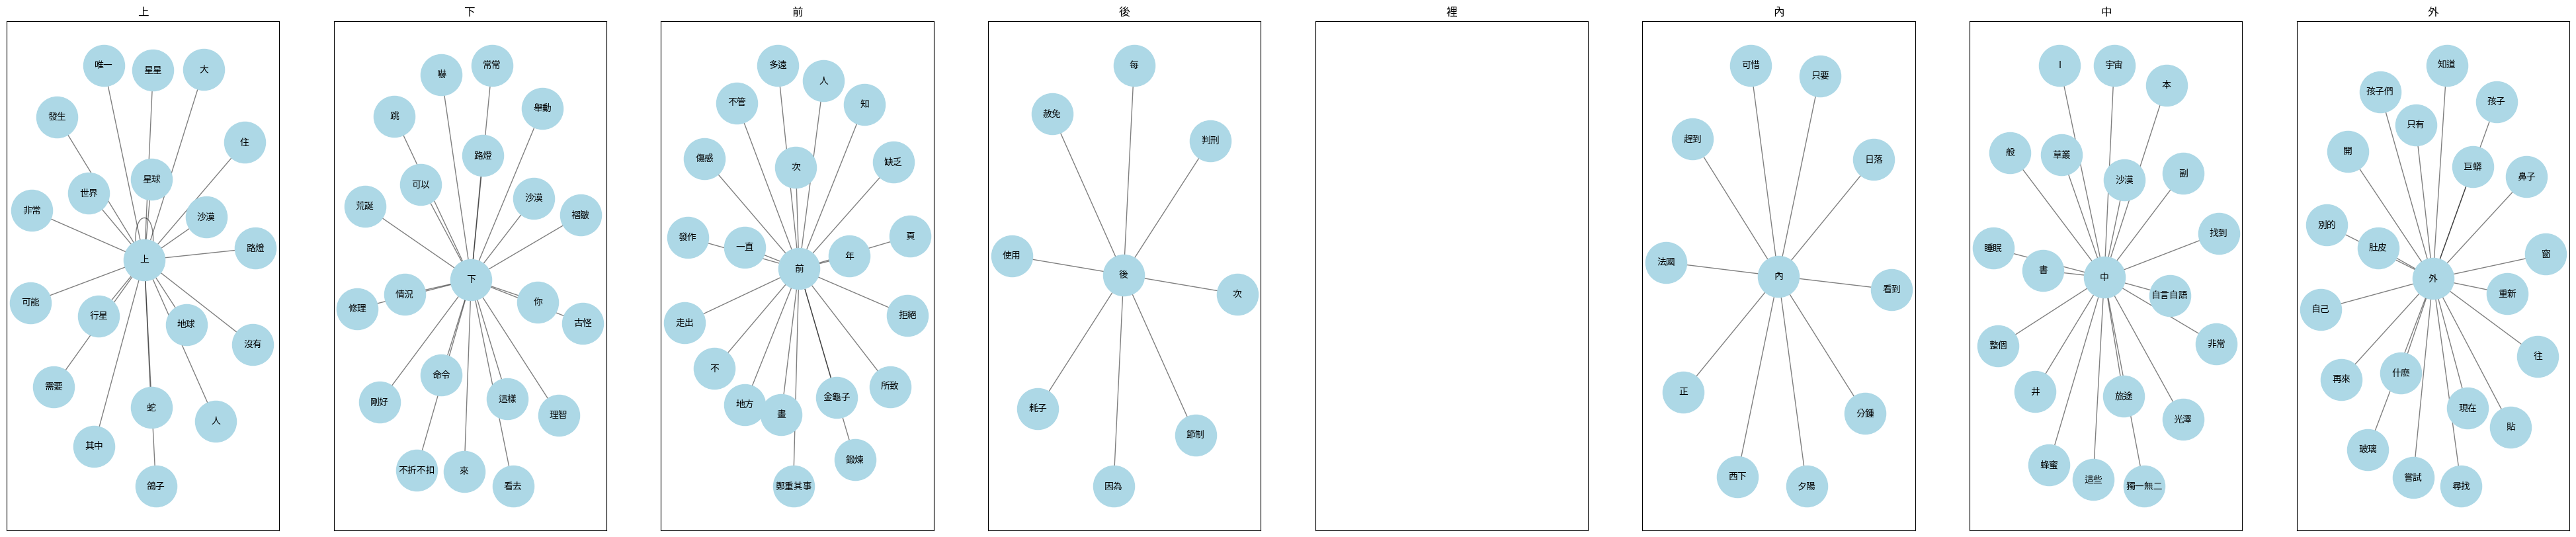

<Figure size 5000x5000 with 0 Axes>

In [97]:
edges_list = []
words_of_interest = ['上','下','前','後','裡','內','中','外']

fig, ax = plt.subplots(nrows=1, ncols=len(words_of_interest), figsize=(50, 10))
fig.set_facecolor('white')

plt.figure(figsize=(50, 50))

number = 20
# Draw network figure
for ind, dir_word in enumerate(words_of_interest):
    # Get the top collocations for each keyword in the list above
    results, results_score, freq_list = get_keyword_collocations(tokens=tokens, keyword=dir_word, numresults=number)
    edges = []
    for i, word in enumerate(results):
        score = results_score[i]
        edges.append((dir_word, word, score))

    ax[ind].title.set_text(dir_word)
    draw(edges, ax[ind])

plt.show()

Top collocations for  上 :
星球 地球 行星 沙漠 世界 上 蛇 星星 路燈 人 唯一 發生 需要 非常 其中 可能 沒有 住 大 鴿子  



,word,frequency,score
1,星球,26,1.518289
3,行星,12,1.043874
2,地球,12,1.064025
6,上,11,0.616217
10,人,11,0.510986
17,沒有,10,0.491220
4,沙漠,9,0.860395
8,星星,8,0.547947
5,世界,7,0.809364
7,蛇,5,0.612686


Top collocations for  下 :
命令 情況 路燈 你 沙漠 這樣 可以 來 修理 嚇 常常 理智 看去 舉動 荒誕 褶皺 跳 不折不扣 剛好 古怪  



,word,frequency,score
4,你,5,0.439232
1,命令,3,0.543550
3,路燈,2,0.449114
5,沙漠,2,0.433192
6,這樣,2,0.412494
7,可以,2,0.409309
8,來,2,0.375873
2,情況,2,0.465036
15,荒誕,1,0.331082
19,剛好,1,0.331082


Top collocations for  前 :
年 一直 次 地方 畫 不 人 不管 傷感 多遠 所致 拒絕 發作 知 缺乏 走出 鄭重其事 金龜子 鍛煉 頁  



,word,frequency,score
1,年,4,0.655408
3,次,3,0.554817
6,不,3,0.370215
2,一直,3,0.569550
4,地方,2,0.427885
5,畫,2,0.408779
7,人,2,0.351460
14,知,1,0.331832
19,鍛煉,1,0.331832
18,金龜子,1,0.331832


Top collocations for  後 :
使用 判刑 赦免 節制 耗子 每 次 因為  



,word,frequency,score
1,使用,1,0.333146
2,判刑,1,0.333146
3,赦免,1,0.333146
4,節制,1,0.333146
5,耗子,1,0.332770
6,每,1,0.330331
7,次,1,0.328455
8,因為,1,0.325265


Top collocations for  裡 :
 



,word,frequency,score


Top collocations for  內 :
法國 趕到 可惜 西下 夕陽 法國 只要 正 分鍾 日落 看到  



,word,frequency,score
1,法國,2,0.471006
2,趕到,1,0.333146
3,可惜,1,0.332958
4,西下,1,0.332958
5,夕陽,1,0.332770
6,法國,1,0.332770
7,只要,1,0.332583
8,正,1,0.331457
9,分鍾,1,0.331269
10,日落,1,0.330894


Top collocations for  中 :
沙漠 書 自言自語 這些 旅途 草叢 井 副 這些 睡眠 光澤 蜂蜜 般 宇宙 獨一無二 找到 I 整個 本 非常  



,word,frequency,score
1,沙漠,7,0.803620
4,這些,5,0.571651
3,自言自語,4,0.614878
2,書,4,0.627825
9,這些,4,0.472459
8,副,3,0.512566
20,非常,3,0.422865
7,井,3,0.527516
6,草叢,3,0.562400
5,旅途,3,0.562400


Top collocations for  外 :
肚皮 什麽 再來 嘗試 窗 貼 鼻子 孩子 往 孩子們 玻璃 巨蟒 只有 重新 別的 開 尋找 現在 知道 自己  



,word,frequency,score
1,肚皮,2,0.469016
2,什麽,2,0.442745
19,知道,1,0.320574
18,現在,1,0.328079
17,尋找,1,0.328455
16,開,1,0.328830
15,別的,1,0.328830
14,重新,1,0.329956
13,只有,1,0.330331
12,巨蟒,1,0.330706


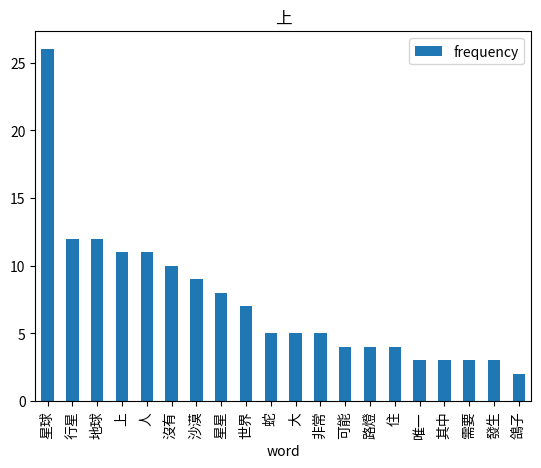

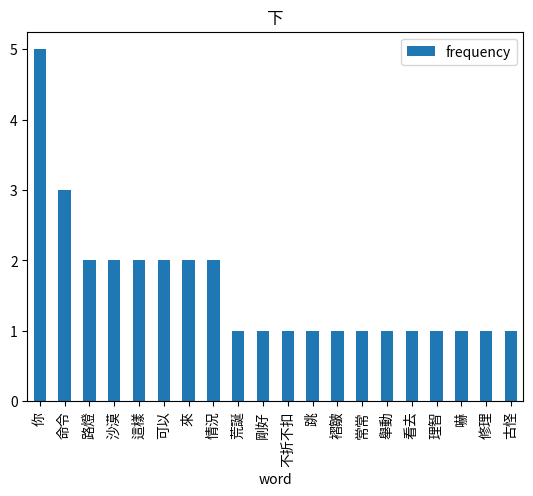

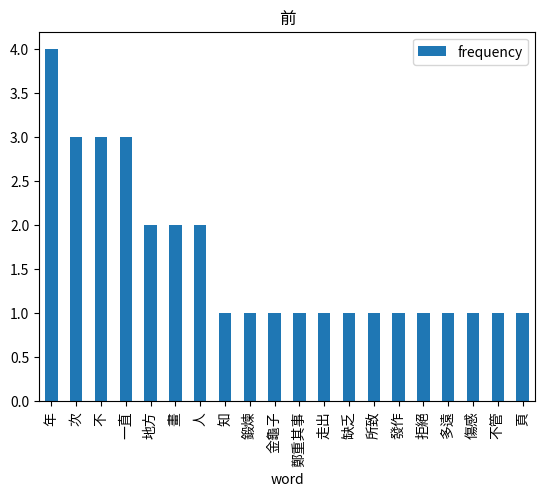

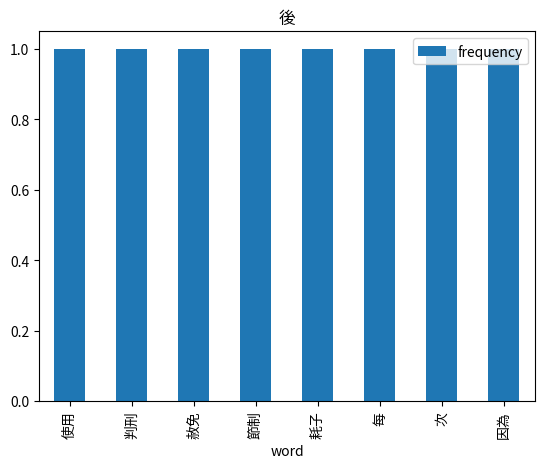

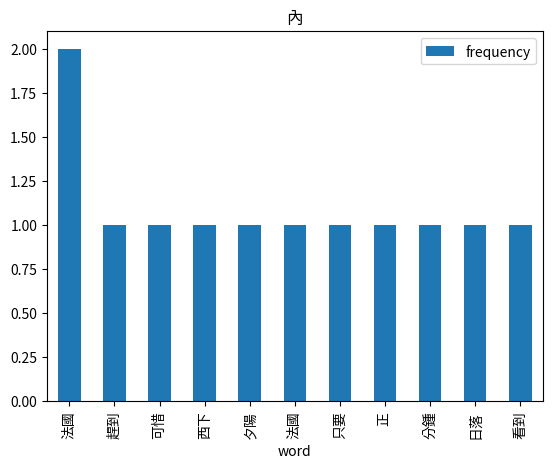

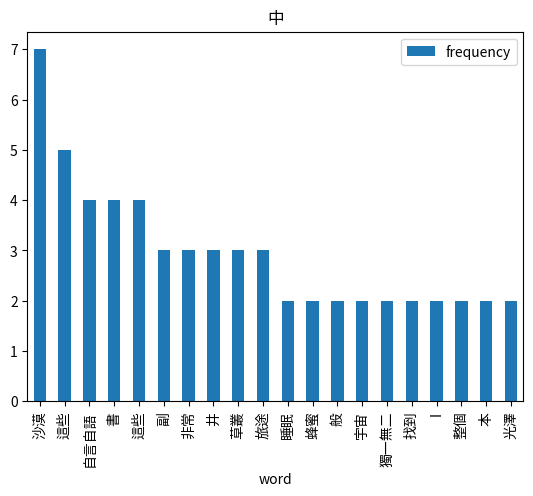

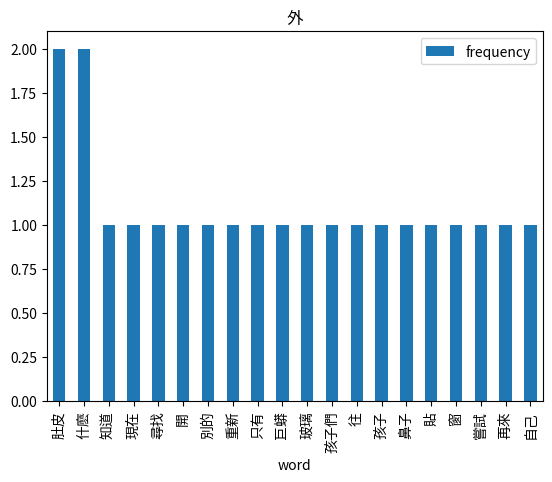

In [98]:
import pandas as pd 
from IPython.display import display, HTML

for ind, dir_word in enumerate(words_of_interest):
    # Get the top collocations for each keyword in the list above
    results, results_score, freq_list = get_keyword_collocations(tokens=tokens, keyword=dir_word, numresults=number)
    # map lists into dict 
    df_dict = {'word': results, 'frequency': freq_list, 'score': results_score} 
        
    df = pd.DataFrame(df_dict)
    df.sort_values(by=['frequency'],inplace=True,ascending=False)
    df.reset_index()
    df.index += 1
    display(HTML(df.to_html()))

    # plotting a bar graph

    if len(results) > 0:
      df.plot(x="word", y="frequency", kind="bar",title=dir_word)